In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import janus
import timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.signal import argrelmax,find_peaks,argrelmin
from scipy.interpolate import interp1d
import imp
from scipy.sparse import csr_matrix
plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

imp.reload(janus)

<module 'janus' from '/home/zackn/snakingoscillators/janus.py'>

### A limit-cycle chimera state

runtime: 37.265329


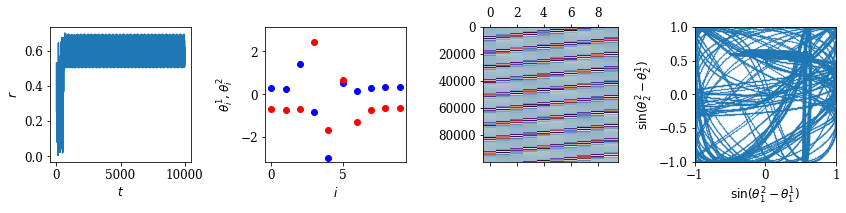

In [2]:
N=10
k=1
t1=10000
t3=9000
dt=0.01
sigma=0.35
beta=0.25
gamma=0.1
output=2
seed=1
omega=1

np.random.seed(seed)
phase_init = np.zeros(4*N,dtype=np.float64)
phi0=-np.pi+2*np.pi*np.random.random(N)
phi1=-np.pi+2*np.pi*np.random.random(N)
phase_init[:N] = np.cos(phi0)
phase_init[N:2*N] = np.sin(phi0)
phase_init[2*N:3*N] = np.cos(phi1)
phase_init[3*N:] = np.sin(phi1)

start = timeit.default_timer()
phases,times,order=janus.runsim(N, t1, t3, dt, omega, beta, sigma, gamma, phase_init)
stop = timeit.default_timer()
print('runtime: %f' % (stop - start))

phases=phases[int(t3/dt):]

phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

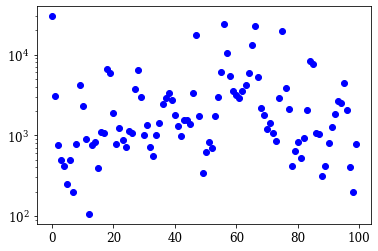

In [3]:
plt.yscale('log')
plt.plot(np.abs(np.fft.fft(phi0,axis=0))[:100,0],'bo')

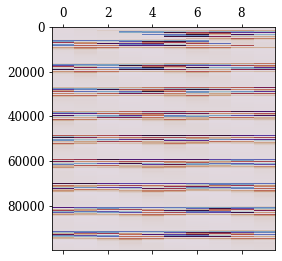

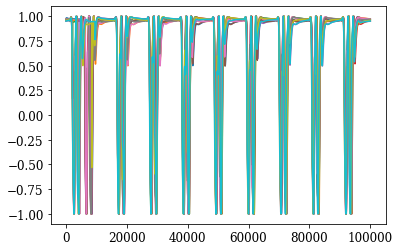

In [4]:
nu=10.5/dt
plt.matshow(np.transpose([np.cos(np.roll(phi0[:,i], 100+int(nu*i))) for i in range(N)]),aspect=len(phi0[0])/len(phi0),cmap='twilight')
plt.show()
plt.plot(np.transpose([np.cos(np.roll(phi0[:,i], 100+int(nu*i))) for i in range(N)]))
plt.show()

### A chaotic or invariant torus chimera state

runtime: 38.406073


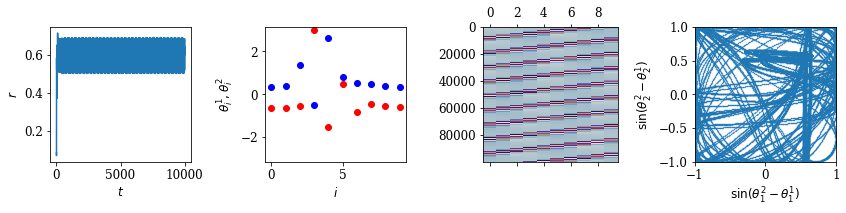

In [5]:
N=10
k=1
t1=10000
t3=9000
dt=0.01
sigma=0.35
beta=0.25
gamma=0.1
output=2
seed=9
omega=1

np.random.seed(seed)
phase_init = np.zeros(4*N,dtype=np.float64)
phi0=-np.pi+2*np.pi*np.random.random(N)
phi1=-np.pi+2*np.pi*np.random.random(N)
phase_init[:N] = np.cos(phi0)
phase_init[N:2*N] = np.sin(phi0)
phase_init[2*N:3*N] = np.cos(phi1)
phase_init[3*N:] = np.sin(phi1)

start = timeit.default_timer()
phases,times,order=janus.runsim(N, t1, t3, dt, omega, beta, sigma, gamma, phase_init)
stop = timeit.default_timer()
print('runtime: %f' % (stop - start))

phases=phases[int(t3/dt):]

phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

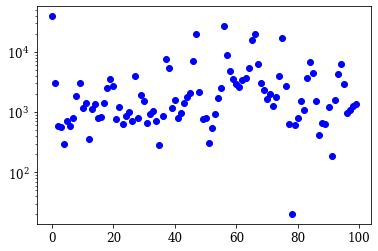

In [6]:
plt.yscale('log')
plt.plot(np.abs(np.fft.fft(phi0,axis=0))[:100,0],'bo')

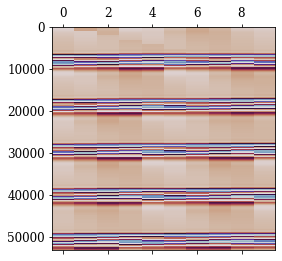

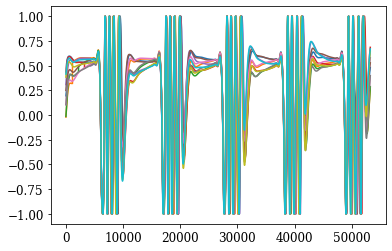

In [7]:
nmax=5*(int(len(phases)/10)+650)

phi0=np.arctan2(phases[:nmax,N:2*N],phases[:nmax,:N])
phi1=np.arctan2(phases[:nmax,3*N:],phases[:nmax,2*N:3*N])

nu=10.5/dt
plt.matshow(np.transpose([np.cos(np.roll(phi1[:,i], 100+int(nu*i))) for i in range(N)]),aspect=len(phi0[0])/len(phi0),cmap='twilight')
plt.show()
plt.plot(np.transpose([np.cos(np.roll(phi1[:,i], 100+int(nu*i))-phi0[:,0]) for i in range(N)]))
plt.show()

### Continue a limit cycle chimera

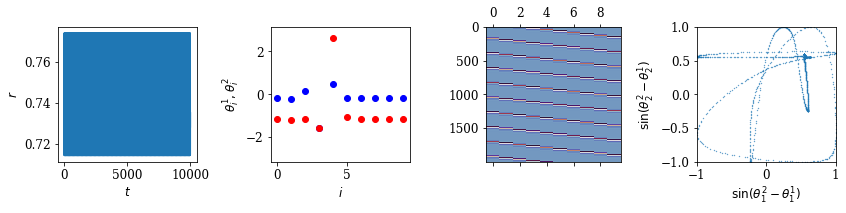

(array([ 0,  1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22,
        23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 43, 44, 45,
        46, 47, 48, 49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 67, 68,
        69, 70, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 91,
        92, 93, 94, 98, 99]),)

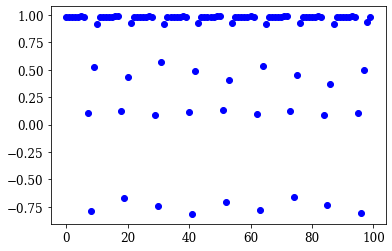

In [197]:
filebase='data/chimera/'
times=np.load(filebase+'times.npy')
order=np.load(filebase+'order.npy')
phases=np.load(filebase+'phases.npy')
fs=np.load(filebase+'fs.npy')
N=int((len(fs)+2)/4)
sigma0=0.35
omega=1
beta=0.25
gamma=0.1
phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

minds=find_peaks(np.diff(phases[:,0]))[0]
plt.plot(phases[minds,0],'bo')
np.where(phases[minds,0]>0.9)

0.22599887157072607

[ 190  408  627  845 1063 1282 1500 1718 1937]


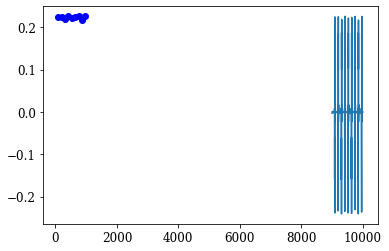

In [209]:
minds=find_peaks(np.diff(phases[:,0]),height=0.9*np.max(np.diff(phases[:,0])))[0]
print(minds)
plt.plot(times[-len(phases)+1:],np.diff(phases[:,0]))
plt.plot(times[minds],np.diff(phases[:,0])[minds],'bo')

In [97]:
imp.reload(janus)

<module 'janus' from '/Users/zack/Documents/oscillators/snakingoscillators/janus.py'>

In [ ]:
m0=6
m1=13
p0=times[minds[m1]]-times[minds[m0]]
x0=(times[minds[m0]:minds[m1]]-times[minds[m0]])/p0
y0=phases[minds[m0]:minds[m1]].T
sigma=sigma0
dsigma=0.5e-3
dsigmamax=1e-3
dsigmamin=1e-6
sigmamin=0.25
sigmamax=0.4
start=timeit.default_timer()
sigmas,sols=janus.cont(filebase,omega,beta,gamma,sigma,x0,y0,p0,sigmamin,sigmamax,dsigma,maxnodes=2000)
stop=timeit.default_timer()
print("runtime: ",stop-start)
phases=sols[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\Theta^1, \Theta^2$')
plt.plot(sols[-1].x, np.transpose([np.roll(theta[:,i], 100+int(len(theta)/N*i)) for i in range(N)]),color='red')
plt.plot(sols[-1].x, np.transpose([np.roll(phi[:,i], 100+int(len(theta)/N*i)) for i in range(N)]),color='blue')
plt.show()

The algorithm converged to the desired accuracy.
0.350000	5.000e-04	140	110.168162	5	8.317527	
0.350500	5.000e-04	156	110.665182	6	9.582905	
0.351000	5.000e-04	317	111.157444	4	7.160751	
0.351500	5.000e-04	317	111.649359	1	5.385840	
0.352000	5.000e-04	317	112.148423	1	5.541137	
0.352500	5.000e-04	317	112.655217	1	6.099383	


/Users/zack/opt/anaconda3/envs/oscillator_env/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


0.353000	5.000e-04	317	113.169888	1	5.119657	
0.353500	5.000e-04	317	113.660584	1	4.671252	
0.354000	5.000e-04	317	114.189925	1	4.608654	
0.354500	5.000e-04	317	114.730268	1	4.750883	
0.355000	5.000e-04	317	115.280279	1	4.709355	
Trying to increase step and/or coarsen.
0.356000	1.000e-03	317	116.448272	2	3.442418	
0.357000	1.000e-03	317	117.625125	1	5.892575	
0.358000	1.000e-03	317	118.851004	1	6.655412	
0.359000	1.000e-03	317	120.132398	1	6.673378	
0.360000	1.000e-03	317	121.476401	1	6.724089	
0.361000	1.000e-03	317	122.891771	1	7.247299	
0.362000	1.000e-03	317	124.389357	1	6.693887	
0.363000	1.000e-03	317	125.982841	1	6.855217	
0.364000	1.000e-03	319	127.688909	2	10.603072	
0.365000	1.000e-03	319	129.527128	1	5.107257	
Trying to increase step and/or coarsen.
0.366000	1.000e-03	320	131.545026	3	15.293090	
0.367000	1.000e-03	320	133.760017	1	5.252849	
0.368000	1.000e-03	320	136.272004	1	4.994594	
0.369000	1.000e-03	320	139.156239	1	6.250932	
0.370000	1.000e-03	320	142.601954	1	5.591406

The algorithm converged to the desired accuracy.
0.350000	-5.000e-04	140	110.168163	5	54.553673	
0.349500	-5.000e-04	283	109.723183	5	49.396076	
0.349000	-5.000e-04	283	109.258266	1	24.333359	
0.348500	-5.000e-04	283	108.799484	1	24.554134	
0.348000	-5.000e-04	283	108.346442	1	23.562521	
0.347500	-5.000e-04	283	107.899364	1	23.754491	


/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


0.347000	-5.000e-04	283	107.457558	1	23.848413	
0.346500	-5.000e-04	283	107.048705	1	23.467665	
0.346000	-5.000e-04	283	106.590302	1	23.971725	
0.345500	-5.000e-04	283	106.164196	1	24.484371	
0.345000	-5.000e-04	283	105.742967	1	25.253505	
0.344000	-1.000e-03	283	104.914511	1	25.964254	
0.343000	-1.000e-03	283	104.103777	1	25.071249	
0.342000	-1.000e-03	283	103.309691	1	13.411072	
0.341000	-1.000e-03	283	102.531550	1	19.396369	
0.340000	-1.000e-03	283	101.768320	1	25.264490	
0.339000	-1.000e-03	283	101.019296	1	19.549105	
0.338000	-1.000e-03	283	100.283736	1	12.658919	
0.337000	-1.000e-03	283	99.561100	1	18.866208	
0.336000	-1.000e-03	283	98.850654	1	19.016737	
0.335000	-1.000e-03	283	98.151882	1	12.717884	
0.334000	-1.000e-03	283	97.464278	1	12.784034	
0.333000	-1.000e-03	283	96.787329	1	12.755454	
0.332000	-1.000e-03	283	96.120572	1	12.805455	
0.331000	-1.000e-03	283	95.463573	1	12.784733	
0.330000	-1.000e-03	283	94.815923	1	12.738179	
0.329000	-1.000e-03	283	94.177236	1	12.704452	
0

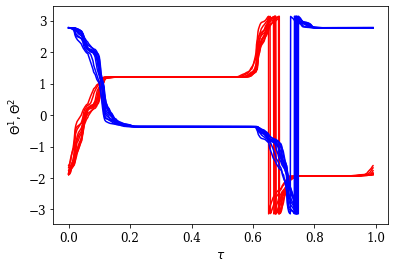

In [10]:
dsigma=-0.5e-3
start=timeit.default_timer()
sigmas2,sols2=janus.cont(omega,beta,gamma,sigma,x0,y0,p0,sigmamin,sigmamax,dsigma,maxnodes=2000)
stop=timeit.default_timer()
print("runtime: ",stop-start)
phases=sols2[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\Theta^1, \Theta^2$')
plt.plot(sols2[-1].x, np.transpose([np.roll(theta[:,i], 100+int(len(theta)/N*i)) for i in range(N)]),color='red')
plt.plot(sols2[-1].x, np.transpose([np.roll(phi[:,i], 100+int(len(theta)/N*i)) for i in range(N)]),color='blue')
plt.show()

In [11]:
Sigmas=[sigmas2[-i] for i in range(1,len(sols2))]+[sigmas[i] for i in range(len(sols))]
Periods=[sols2[-i].p[0] for i in range(1,len(sols2))]+[sols[i].p[0] for i in range(len(sols))]
Ts=[sols2[-i].x for i in range(1,len(sols2))]+[sols[i].x for i in range(len(sols))]
Ys=[sols2[-i].y for i in range(1,len(sols2))]+[sols[i].y for i in range(len(sols))]
np.save(filebase+'lcsigmas.npy',Sigmas)
np.save(filebase+'lcperiods.npy',Periods)
for i in range(len(Sigmas)):
    np.save(filebase+'lctimes_'+str(i)+'.npy',Ts[i])
    np.save(filebase+'lcphases_'+str(i)+'.npy',Ys[i])

### Continue the unstable limit cycle chimera branch

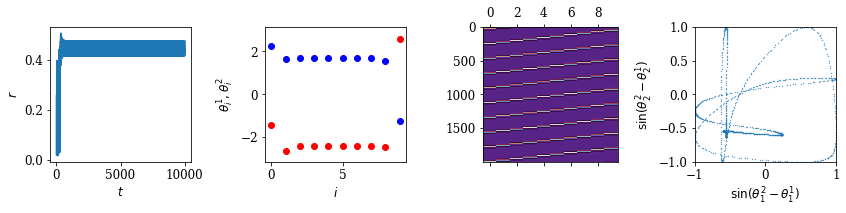

(array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63]),)

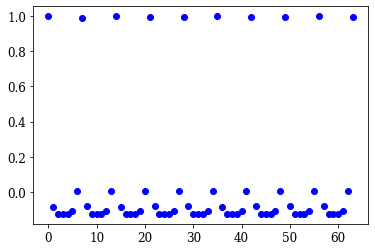

In [12]:
filebase='data/uchimera/'
times=np.load(filebase+'times.npy')
order=np.load(filebase+'order.npy')
phases=np.load(filebase+'phases.npy')
fs=np.load(filebase+'fs.npy')
N=int((len(fs)+2)/4)
sigma0=0.35
omega=1
beta=0.25
gamma=0.1
phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

minds=find_peaks(phases[:,0])[0]
plt.plot(phases[minds,0],'bo')
np.where(phases[minds,0]>0.9)

The algorithm converged to the desired accuracy.
0.350000	5.000e-04	219	109.700171	2	37.120301	
0.350500	5.000e-04	219	110.174768	1	14.031540	
0.351000	5.000e-04	219	110.658256	1	18.708066	
0.351500	5.000e-04	219	111.146225	1	4.704736	
0.352000	5.000e-04	219	111.643792	1	4.950228	
0.352500	5.000e-04	219	112.149812	1	18.449054	
0.353000	5.000e-04	219	112.662251	1	18.926187	
0.353500	5.000e-04	219	113.182031	1	4.679745	


/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


0.354000	5.000e-04	219	113.661485	1	18.236923	
0.354500	5.000e-04	219	114.251518	1	18.999176	
0.355000	5.000e-04	219	114.799828	1	18.873491	
0.356000	1.000e-03	219	115.924516	1	19.282970	
0.357000	1.000e-03	219	117.095507	1	19.275802	
0.358000	1.000e-03	219	118.315552	1	19.278457	
0.359000	1.000e-03	219	119.590637	1	19.314246	
0.360000	1.000e-03	219	120.927845	1	19.338438	
0.361000	1.000e-03	219	122.340196	1	19.249844	
0.362000	1.000e-03	219	123.831390	1	19.699018	
0.363000	1.000e-03	219	125.417594	1	19.684521	
0.364000	1.000e-03	219	127.117751	1	19.256525	
0.365000	1.000e-03	219	128.951703	1	19.468213	
0.366000	1.000e-03	219	130.948597	1	18.910058	
0.367000	1.000e-03	219	133.168438	1	19.306461	
0.368000	1.000e-03	219	135.659119	1	19.449171	
0.369000	1.000e-03	219	138.528457	1	19.374112	
0.370000	1.000e-03	219	141.957313	1	19.241560	
0.371000	1.000e-03	225	146.307582	3	58.033801	
0.372000	1.000e-03	233	152.574593	3	60.833773	
0.373000	1.000e-03	465	174.960343	2	61.713555	


/Users/zack/Documents/oscillators/snakingoscillators/janus.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigmat = sigma0 + (sigma - sigma0) * t / t0


The maximum number of mesh nodes is exceeded.
0.373000	5.000e-04	465	174.960343	2	290.350633	
The maximum number of mesh nodes is exceeded.
0.373000	2.500e-04	465	174.960343	2	295.763352	
The maximum number of mesh nodes is exceeded.
0.373000	1.250e-04	465	174.960343	2	289.280431	
The maximum number of mesh nodes is exceeded.
0.373000	6.250e-05	465	174.960343	2	286.258193	
The maximum number of mesh nodes is exceeded.
0.373000	3.125e-05	465	174.960343	2	290.903601	
The maximum number of mesh nodes is exceeded.
0.373000	1.563e-05	465	174.960343	2	176.142057	
0.373016	1.563e-05	465	173.299532	1	30.634000	
The maximum number of mesh nodes is exceeded.
0.373016	7.813e-06	465	173.299532	1	321.106311	
0.373023	7.813e-06	465	174.036479	1	40.689918	
Saddle-node expected at  0.37310525648751725 . Looking for second branch
Found second branch. Continuing. 174.03647936953942 173.3366139052155 174.77342653814532
0.373023	7.813e-06	465	173.336614	1	11.042786	
0.373016	-7.813e-06	465	173.136487	1	41

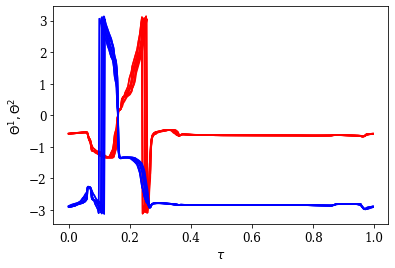

In [13]:
m0=7
m1=14
phases=np.concatenate([np.cos(-np.flip(phi0,axis=0)),np.sin(-np.flip(phi0,axis=0)),np.cos(-np.flip(phi1,axis=0)),np.sin(-np.flip(phi1,axis=0))],axis=1)
p0=times[minds[m1]]-times[minds[m0]]
x0=(times[minds[m0]:minds[m1]]-times[minds[m0]])/p0
y0=phases[minds[m0]:minds[m1]].T
sigma=sigma0
dsigma=0.5e-3
dsigmamax=1e-3
dsigmamin=1e-6
sigmamin=0.25
sigmamax=0.4
start=timeit.default_timer()
sigmas,sols=janus.cont(omega,beta,gamma,sigma,x0,y0,p0,sigmamin,sigmamax,dsigma,maxnodes=2000)
stop=timeit.default_timer()
print("runtime: ",stop-start)
phases=sols[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\Theta^1, \Theta^2$')
plt.plot(sols[-1].x, np.transpose([np.roll(theta[:,i], 100-int(len(theta)/N*i)) for i in range(N)]),color='red')
plt.plot(sols[-1].x, np.transpose([np.roll(phi[:,i], 100-int(len(theta)/N*i)) for i in range(N)]),color='blue')
plt.show()

The algorithm converged to the desired accuracy.
0.350000	-5.000e-04	219	109.700171	2	37.377628	
0.349500	-5.000e-04	219	109.258777	1	18.411739	
0.349000	-5.000e-04	219	108.768205	1	14.233329	
0.348500	-5.000e-04	219	108.311546	1	19.085259	
0.348000	-5.000e-04	219	107.860657	1	18.976589	
0.347500	-5.000e-04	219	107.415460	1	18.419056	


/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


0.347000	-5.000e-04	219	106.975683	1	18.623992	
0.346500	-5.000e-04	219	106.541349	1	18.841679	
0.346000	-5.000e-04	219	106.112100	1	19.048968	
0.345500	-5.000e-04	219	105.687832	1	14.492546	
0.345000	-5.000e-04	219	105.268311	1	14.206640	
0.344000	-1.000e-03	219	104.439496	1	19.604205	
0.343000	-1.000e-03	219	103.636062	1	19.648036	
0.342000	-1.000e-03	219	102.845324	1	19.228322	
0.341000	-1.000e-03	219	102.071052	1	14.857011	
0.340000	-1.000e-03	219	101.310343	1	10.110154	
0.339000	-1.000e-03	219	100.565119	1	9.710931	
0.338000	-1.000e-03	219	99.832070	1	9.986451	
0.337000	-1.000e-03	219	99.112556	1	10.102812	
0.336000	-1.000e-03	219	98.405072	1	9.658276	
0.335000	-1.000e-03	219	97.709344	1	9.606051	
0.334000	-1.000e-03	219	97.024713	1	9.580606	
0.333000	-1.000e-03	219	96.350700	1	9.579819	
0.332000	-1.000e-03	219	95.686839	1	9.593233	
0.331000	-1.000e-03	219	95.035369	1	5.076790	
0.330000	-1.000e-03	219	94.387880	1	14.512918	
0.329000	-1.000e-03	219	93.751976	1	9.625804	
0.328000	-1

/Users/zack/Documents/oscillators/snakingoscillators/janus.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigmat = sigma0 + (sigma - sigma0) * t / t0
/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1105: RuntimeWarning: invalid value encountered in greater
  insert_1, = np.nonzero((rms_res > tol) & (rms_res < 100 * tol))
/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1105: RuntimeWarning: invalid value encountered in less
  insert_1, = np.nonzero((rms_res > tol) & (rms_res < 100 * tol))
/Users/zack/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1106: RuntimeWarning: invalid value encountered in greater_equal
  insert_2, = np.nonzero(rms_res >= 100 * tol)


solution changed too much
0.251000	-5.000e-04	321	48.515269	2	193.053604	
0.250500	-5.000e-04	349	47.711852	2	58.495618	
The maximum number of mesh nodes is exceeded.
0.250500	-2.500e-04	349	47.711852	2	254.213312	
The maximum number of mesh nodes is exceeded.
0.250500	-1.250e-04	349	47.711852	2	341.817294	
0.250375	-1.250e-04	349	47.524941	1	30.264391	
0.250250	-1.250e-04	349	47.305394	1	30.348172	
The maximum number of mesh nodes is exceeded.
0.250250	-6.250e-05	349	47.305394	1	215.400386	
0.250188	-6.250e-05	349	47.219227	1	31.042050	
The maximum number of mesh nodes is exceeded.
0.250188	-3.125e-05	349	47.219227	1	254.434955	
0.250156	-3.125e-05	349	47.190832	1	30.826495	
The maximum number of mesh nodes is exceeded.
0.250156	-1.563e-05	349	47.190832	1	269.825932	
The maximum number of mesh nodes is exceeded.
0.250156	-7.813e-06	349	47.190832	1	301.708215	
The maximum number of mesh nodes is exceeded.
0.250156	-3.906e-06	349	47.190832	1	226.523897	
The maximum number of mesh nodes 

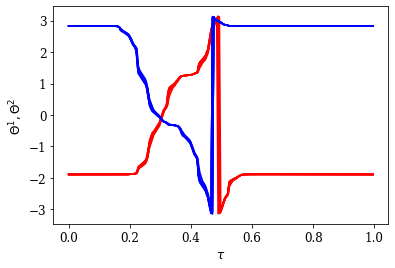

In [14]:
dsigma=-0.5e-3
start=timeit.default_timer()
sigmas2,sols2=janus.cont(omega,beta,gamma,sigma,x0,y0,p0,sigmamin,sigmamax,dsigma,maxnodes=2000)
stop=timeit.default_timer()
print("runtime: ",stop-start)
phases=sols2[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\Theta^1, \Theta^2$')
plt.plot(sols2[-1].x, np.transpose([np.roll(theta[:,i], 100-int(len(theta)/N*i)) for i in range(N)]),color='red')
plt.plot(sols2[-1].x, np.transpose([np.roll(phi[:,i], 100-int(len(theta)/N*i)) for i in range(N)]),color='blue')
plt.show()

### Plot order parameter

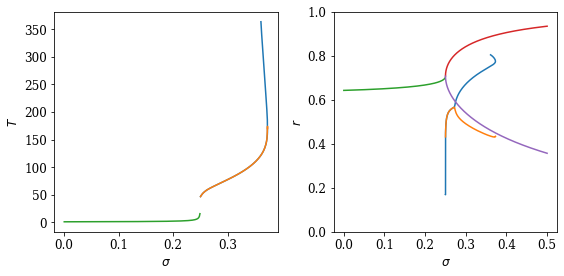

In [639]:
filebase='data/chimera2/'
Sigmas=np.concatenate([np.flip(np.load(filebase+'lc_backward_sigmas.npy')),np.load(filebase+'lc_forward_sigmas.npy')])
Periods=np.concatenate([np.flip(np.load(filebase+'lc_backward_periods.npy')),np.load(filebase+'lc_forward_periods.npy')])
Orders=np.concatenate([np.flip(np.load(filebase+'lc_backward_orders.npy')),np.load(filebase+'lc_forward_orders.npy')])

filebase='data/uchimera2/'
Sigmas2=-np.concatenate([np.flip(np.load(filebase+'lc_backward_sigmas.npy')),np.load(filebase+'lc_forward_sigmas.npy')])
Periods2=np.concatenate([np.flip(np.load(filebase+'lc_backward_periods.npy')),np.load(filebase+'lc_forward_periods.npy')])
Orders2=np.concatenate([np.flip(np.load(filebase+'lc_backward_orders.npy')),np.load(filebase+'lc_forward_orders.npy')])


plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('$\sigma$')
plt.ylabel('$T$')
plt.plot(Sigmas,Periods)
plt.plot(Sigmas2,Periods2)
sigmas=np.arange(0,0.25,0.001)
plt.plot(sigmas,[1/(0.75-2*sigma-4*sigma**2)**0.5 for sigma in sigmas])

plt.subplot(1,2,2)
plt.xlabel('$\sigma$')
plt.ylabel('$r$')
plt.plot(Sigmas,Orders)
plt.plot(Sigmas2,Orders2)
plt.ylim(0,1)
sigmas=np.arange(0,0.25,0.001)
plt.plot(sigmas,[np.mean(1/(1+0.25*(1+4*sigma-((1-4*sigma)*(3+4*sigma))**0.5*np.tan(2*np.pi/(0.75-2*sigma-4*sigma**2)**0.5*np.arange(0,100)/100*0.25*((1-4*sigma)*(3+4*sigma))**0.5))**2)**0.5) for sigma in sigmas])
sigmas=np.arange(0.25,0.5,0.00001)
plt.plot(sigmas,[(2+2*(1-1/(4*(0.25+sigma)**2))**0.5)**0.5/2 for sigma in sigmas])
plt.plot(sigmas,[(2-2*(1-1/(4*(0.25+sigma)**2))**0.5)**0.5/2 for sigma in sigmas])
plt.tight_layout()
plt.savefig('diagram.pdf')
plt.show()

### Find Floquet exponents

0.368625 249.29125615673007
470.7424295840319


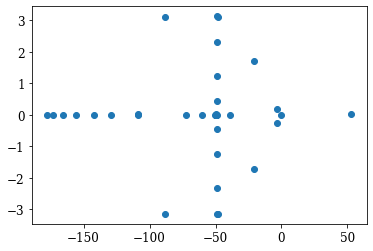

[-1.77730460e+02-1.58864116e-05j -1.72998823e+02+1.18398452e-04j
 -1.65440693e+02-2.64337007e-04j -1.55412427e+02+6.57299195e-04j
 -1.42244313e+02-2.15915973e-03j -1.29081119e+02+6.32044410e-03j
 -1.09019589e+02+8.33576496e-03j -1.08398756e+02+1.53149976e-02j
 -8.85539506e+01+3.11220986e+00j -8.85509457e+01-3.14159265e+00j
 -7.23457402e+01+8.07445160e-03j -6.04529265e+01+3.20231666e-04j
 -5.07352501e+01-1.77995601e-02j -4.98674691e+01+4.60136604e-05j
 -4.98572052e+01+1.46933548e-04j -4.98558739e+01+4.48117533e-05j
 -4.98546011e+01+1.26462630e-04j -4.98534610e+01+1.38266378e-03j
 -4.98534014e+01-1.09240765e-03j -4.98515169e+01+8.79356280e-05j
 -4.97839415e+01-9.35412841e-03j -4.97833486e+01+1.06178995e-02j
 -4.89503006e+01-3.14159265e+00j -4.88831696e+01+3.12387601e+00j
 -4.88825973e+01-2.16857190e-02j -4.85623337e+01-2.32045026e+00j
 -4.85618946e+01+2.30064407e+00j -4.85538854e+01-1.24837797e+00j
 -4.85504222e+01+1.24233168e+00j -4.85164303e+01-4.40743882e-01j
 -4.85086563e+01+4.420292

In [88]:
filebase='data/chimera/'
M=200

periods=np.load(filebase+'lc_forward_periods.npy')
sigmas=np.load(filebase+'lc_forward_sigmas.npy')
orders=np.load(filebase+'lc_forward_orders.npy')
ind=15*5
x=np.load(filebase+'lc_forward_times_'+str(ind)+'.npy')
y=np.load(filebase+'lc_forward_phases_'+str(ind)+'.npy')
N=int(y.shape[0]/4)
omega=1
beta=0.25
gamma=0.1
sigma=sigmas[ind]
p0=periods[ind]
print(sigma,p0)
    
sol=interp1d(x,y,kind='cubic')
start=timeit.default_timer()
x0=np.arange(M)/M
y0=np.array([sol(t) for t in x0]).T
p=[p0]

mat1=p[0]*np.transpose([janus.janus_jac(p[0]*x0[i],y0[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(x0))],(1,2,0))
fmat=np.fft.fft(mat1,axis=2)
mat4=np.zeros((4*N*M,4*N*M),dtype=np.complex128)

iden=np.identity(M)
iden2=np.identity(4*N)
for i in range(4*N):
    for j in range(4*N):
        for k in range(M):
            for l in range(M):
                l2=l
                k2=k
                if(l>M/2):
                    l2=l-M
                if(k>M/2):
                    k2=k-M
                d=k2-l2
                if(d>=0 and d<=M/2):
                    mat4[4*N*k+i,4*N*l+j]=fmat[i,j,d]/(M)-2j*np.pi*k2*iden[k,l]*iden2[i,j]
                elif(d<0 and d>=-M/2):
                    mat4[4*N*k+i,4*N*l+j]=fmat[i,j,d+M]/(M)
evals,evecs=np.linalg.eig(mat4)
stop=timeit.default_timer()
print(stop-start)

floquet=evals[np.argsort(np.abs(np.imag(evals)))[:4*N]]
plt.scatter(np.real(floquet),np.imag(floquet))
plt.show()
print(floquet[np.argsort(np.real(floquet))])

In [172]:
filebase='data/chimera/'
M=150

periods=np.load(filebase+'lc_forward_periods.npy')
sigmas=np.load(filebase+'lc_forward_sigmas.npy')
orders=np.load(filebase+'lc_forward_orders.npy')
floquets=[]

start2=timeit.default_timer()
for ind in np.arange(0,len(sigmas),5):
    x=np.load(filebase+'lc_forward_times_'+str(ind)+'.npy')
    y=np.load(filebase+'lc_forward_phases_'+str(ind)+'.npy')
    N=int(y.shape[0]/4)
    omega=1
    sigma=sigmas[ind]
    beta=0.25
    gamma=0.1
    def fun(ts,Xts,p):
            return p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))])
    def funjac(ts,Xts,p):
            return p[0]*np.transpose([janus.janus_jac(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))],(1,2,0)),  np.transpose([fun(ts,Xts,p)/p[0]],(1,0,2))
    mat1,mat2=funjac(x,y,[periods[ind]])

    sol=interp1d(x,y,kind='cubic')
    start=timeit.default_timer()
    mat1,mat2=funjac(np.arange(M)/M,np.array([sol(i/M) for i in np.arange(M)]).T,[periods[ind]])
    fmat=np.fft.fft(mat1,axis=2)
    mat4=np.zeros((4*N*M,4*N*M),dtype=np.complex128)

    iden=np.identity(M)
    iden2=np.identity(4*N)
    for i in range(4*N):
        for j in range(4*N):
            for k in range(M):
                for l in range(M):
                    l2=l
                    k2=k
                    if(l>M/2):
                        l2=l-M
                    if(k>M/2):
                        k2=k-M
                    d=k2-l2
                    if(d>=0 and d<=M/2):
                        mat4[4*N*k+i,4*N*l+j]=fmat[i,j,d]/M-2j*np.pi*k2*iden[k,l]*iden2[i,j]
                    elif(d<0 and d>=-M/2):
                        mat4[4*N*k+i,4*N*l+j]=fmat[i,j,d+M]/M
    evals,evecs=np.linalg.eig(mat4)
    stop=timeit.default_timer()
    print(sigma, ind, len(sigmas), stop-start)

    floquet=evals[np.argsort(np.abs(np.imag(evals)))[:4*N]]
    floquets.append(floquet[np.argsort(np.real(floquet))])
    
stop2=timeit.default_timer()
print(stop2-start2)

0.35 0 176 86.03494261414744
0.3525 5 176 86.36950551578775
0.355 10 176 86.80237481812946
0.36 15 176 85.51567012281157
0.365 20 176 84.80240018805489
0.37 25 176 85.09828920708969
0.3724375 30 176 82.62289637117647
0.37228125000000006 35 176 82.4630917950999
0.37212500000000015 40 176 82.33940723980777
0.37181250000000005 45 176 83.02367795910686
0.37149999999999994 50 176 82.67378710303456
0.3710624999999999 55 176 81.77713620406576
0.3707499999999998 60 176 82.32818156597205
0.3702499999999998 65 176 82.6296770691406
0.36962499999999987 70 176 81.97253661719151
0.368625 75 176 80.28955098195001
0.3676250000000001 80 176 80.26528061297722
0.36718750000000006 85 176 79.02210294711404
0.36687499999999995 90 176 79.79654050501995
0.36637499999999995 95 176 79.52627620706335
0.36587499999999995 100 176 79.92082230513915
0.36556249999999985 105 176 80.1644840319641
0.3651249999999998 110 176 79.9908903921023
0.3644999999999999 115 176 80.91760872700252
0.363625 120 176 80.55814927304164


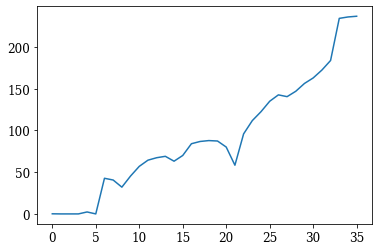

In [180]:
plt.plot(np.max(np.real(np.array(floquets)),axis=1))

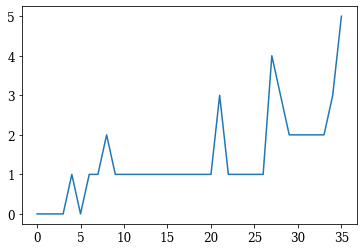

In [194]:
plt.plot(np.count_nonzero(np.real(np.array(floquets))>1e0,axis=1))

In [176]:
len(sigmas)

50

In [624]:
from scipy.linalg import expm
filebase='data/chimera2/'
periods=np.load(filebase+'lc_forward_periods.npy')
sigmas=np.load(filebase+'lc_forward_sigmas.npy')
orders=np.load(filebase+'lc_forward_orders.npy')
print(len(sigmas))
floquets=[]
start2=timeit.default_timer()
# for ind in range(0,len(sigmas),10):
for ind in range(235-10,235,1):
    x=np.load(filebase+'lc_forward_times_'+str(ind)+'.npy')
    y=np.load(filebase+'lc_forward_phases_'+str(ind)+'.npy')
    N=int(y.shape[0]/4)
    omega=1
    beta=0.25
    gamma=0.1
    sigma=sigmas[ind]
    p0=periods[ind]
    start=timeit.default_timer()
    sol=interp1d(x,p0*np.transpose([janus.janus_jac(p0*x[i],y[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(x))],(1,2,0)),axis=2,kind='cubic',fill_value='extrapolate')
    def mfunc(t,y):
        return (sol(np.mod(t,1))@(y.reshape((4*N,4*N)))).reshape(4*N*4*N)
    sol2=solve_ivp(mfunc,[0,1],(np.identity(4*N)).reshape((4*N*4*N)),t_eval=[1],method='RK45',max_step=np.mean(np.diff(x)))
    mon=sol2.y.reshape((4*N,4*N))

#     mon=np.identity(4*N)
#     for i in range(len(np.diff(x))): 
#         jac=p0*janus.janus_jac(p0*x[i],y[:,i], N, omega, sigma, beta, gamma,sigma,-1)
#         evals,evecs=np.linalg.eig(jac)
#         mon=evecs@np.diag(np.exp(np.diff(x)[i]*evals))@np.linalg.inv(evecs)@mon
        
    evals,evecs=np.linalg.eig(mon)
    stop=timeit.default_timer()
    floquet=np.log(evals)
    floquets.append(floquet[np.argsort(floquet)])
    print(sigma,p0,stop-start,ind,len(sigmas),sol2.message)
    
stop2=timeit.default_timer()
print(stop2-start2)

243
0.3722999999999975 154.42411831632214 0.25881900102831423 225 243 The solver successfully reached the end of the integration interval.
0.3723999999999975 155.45688142939085 0.24465754814445972 226 243 The solver successfully reached the end of the integration interval.
0.3724999999999975 156.60515768630498 0.329927820013836 227 243 The solver successfully reached the end of the integration interval.
0.3725999999999975 157.88605209272188 0.4272930510342121 228 243 The solver successfully reached the end of the integration interval.
0.3726999999999975 159.36855806615387 0.3281054541002959 229 243 The solver successfully reached the end of the integration interval.
0.37279999999999747 161.15955748699727 0.35880129411816597 230 243 The solver successfully reached the end of the integration interval.
0.37289999999999746 163.50788348839228 0.3935434159357101 231 243 The solver successfully reached the end of the integration interval.
0.37289999999999746 168.38642977241145 0.2856586559209

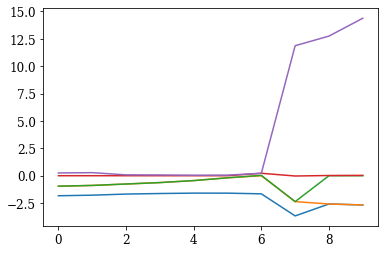

In [625]:
plt.plot(np.real(np.array(floquets)[:,-5:]))
plt.show()

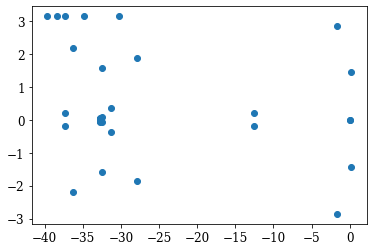

In [627]:
plt.scatter(np.real(floquets[6]),np.imag(floquets[6]))

In [628]:
np.real(np.array(floquets)[:,-5:])

array([[-1.83046072e+00, -9.55516770e-01, -9.55516770e-01,
        -2.21601940e-04,  2.51270252e-01],
       [-1.77756300e+00, -8.88067385e-01, -8.88067385e-01,
        -1.86514463e-04,  2.79482980e-01],
       [-1.67573196e+00, -7.56739620e-01, -7.56739620e-01,
        -2.37911375e-05,  7.95112663e-02],
       [-1.62556584e+00, -6.26622212e-01, -6.26622212e-01,
         8.48154680e-05,  6.85268906e-02],
       [-1.59016586e+00, -4.44695950e-01, -4.44695950e-01,
         1.39429704e-04,  4.66822889e-02],
       [-1.59283902e+00, -1.90421656e-01, -1.90421656e-01,
         1.49107369e-04,  5.31011192e-02],
       [-1.65484459e+00,  2.35368671e-04,  3.26349476e-02,
         2.22894149e-01,  2.22894149e-01],
       [-3.67133306e+00, -2.36686149e+00, -2.36686149e+00,
        -2.62179362e-02,  1.18732644e+01],
       [-2.58161080e+00, -2.58161080e+00, -3.68527465e-04,
         1.86038293e-02,  1.27511926e+01],
       [-2.66990677e+00, -2.66990677e+00, -4.37326355e-04,
         3.01187052e-02

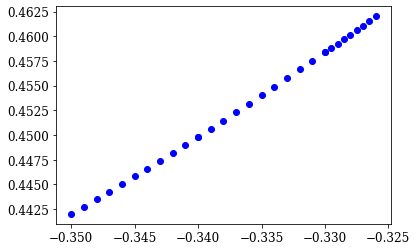

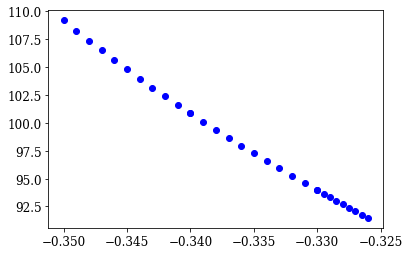

31


In [110]:
filebase='data/uchimera2/lc_forward'
# filebase='data/chimera2/lc_backward'
periods=np.load(filebase+'_periods.npy')
sigmas=np.load(filebase+'_sigmas.npy')
orders=np.load(filebase+'_orders.npy')
plt.plot(sigmas,orders,'bo')
plt.show()
plt.plot(sigmas,periods,'bo')
plt.show()
print(len(sigmas))
ind=len(sigmas)-1
x=np.load(filebase+'_times_'+str(ind)+'.npy')
y=np.load(filebase+'_phases_'+str(ind)+'.npy')

0.37291346160093214 0.00010096160093231443 171.3394880705641


[]

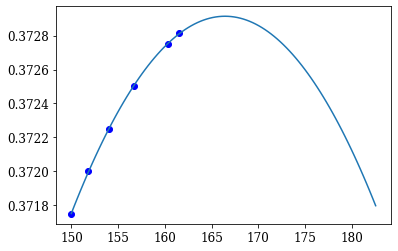

In [105]:
from scipy.optimize import leastsq
SNum=6
ys=periods[-SNum:]
xs=sigmas[-SNum:]
xm=xs[-1]-(xs[-1]-xs[-3])/(ys[-1]-ys[-3])*ys[-1]
ym=ys[-1]
func=lambda x: x[0]+x[1]*(ys-x[2])**2-xs
x,n=leastsq(func,[xm,(xm-xs[0])/(ys[0]-ym)**2,ym])
plt.plot(ys,xs,'bo')
ys2=ys[0]+(2*x[2]-ys[0]-ys[0])*np.arange(0,100)/100
plt.plot(ys2,x[0]+x[1]*(ys2-x[2])**2)
print(x[0],x[0]-xs[-1], 2*x[2]-periods[-1])
plt.plot()


In [603]:
ind=len(sigmas)-1
x0=np.load(filebase+'lc_forward_times_'+str(ind)+'.npy')
y0=np.load(filebase+'lc_forward_phases_'+str(ind)+'.npy')
p0=periods[ind]
sigma=sigmas[ind-1]
maxnodes=10000
tol=1e-4
def fun(ts,Xts,p):
    return np.transpose([p[0]*janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))])
def pbc(xa,xb,p):
    return np.concatenate([xb-xa,[xa[0]-bc]])
def funjac(ts,Xts,p):
    return p[0]*np.transpose([janus.janus_jac(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))],(1,2,0)),  np.transpose([fun(ts,Xts,p)/p[0]],(1,0,2))
def bcjac(xa,xb,p):
    ret0=np.zeros(4*N)
    ret1=np.zeros(4*N)
    ret0[0]=1
    return np.concatenate([-np.identity(4*N),ret0[np.newaxis,:]],axis=0),np.concatenate([np.identity(4*N),ret1[np.newaxis,:]],axis=0),np.zeros((4*N+1,1))

start2=timeit.default_timer()
sol=solve_bvp(fun, pbc, x0, y0, p=np.array([p0]), fun_jac=funjac, bc_jac=bcjac, max_nodes=maxnodes,tol=tol/(np.max(np.diff(x0))),bc_tol=bctol,verbose=2)
stop2=timeit.default_timer()
print(start2-stop2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.66e-01       1.11e-16         3372            25       
       2          9.20e-02       0.00e+00         3397             0       
Solved in 2 iterations, number of nodes 3397. 
Maximum relative residual: 9.20e-02 
Maximum boundary residual: 0.00e+00
-67.78324688808061


In [607]:
periods[-2]

165.35168371887306

### Limit cycle bvp

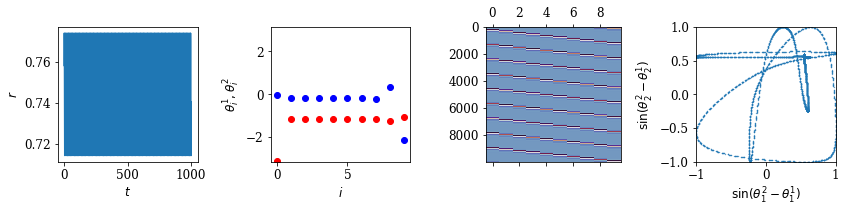

[ 321 1412 2504 3596 4688 5780 6872 7964 9056]
(40, 1092)


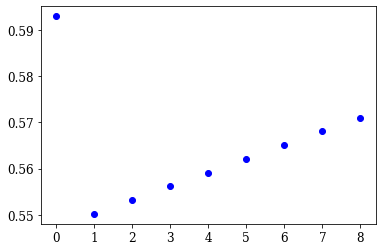

In [472]:
filebase='data/chimera2/'
times=np.load(filebase+'times.npy')
order=np.load(filebase+'order.npy')
phases=np.load(filebase+'phases.npy')
fs=np.load(filebase+'fs.npy')
N=int((len(fs)+2)/4)
sigma0=0.35
omega=1
beta=0.25
gamma=0.1
phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

minds=find_peaks(np.diff(phases[:,0]),height=0.9*np.max(np.diff(phases[:,0])))[0]
plt.plot(phases[minds,0],'bo')
print(minds)
p0=times[minds[1]]-times[minds[0]]
x0=(times[minds[0]:minds[1]+1]-times[minds[0]])/p0
y0=phases[minds[0]:minds[1]+1].T
print(y0.shape)

In [477]:
p0=times[minds[1]]-times[minds[0]]
x0=(times[minds[0]:minds[1]+1]-times[minds[0]])/p0
y0=phases[minds[0]:minds[1]+1].T
tol/(p0*np.min(np.diff(x0)))

0.09165902841430494

(40, 1092)


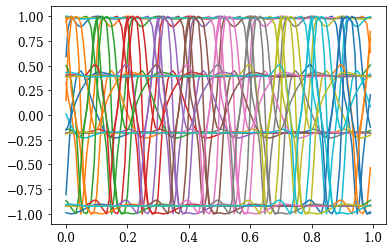

(40, 100)


In [473]:
p0=times[minds[1]]-times[minds[0]]
x0=(times[minds[0]:minds[1]+1]-times[minds[0]])/p0
y0=phases[minds[0]:minds[1]+1].T
print(y0.shape)
arc=np.concatenate([[0],np.cumsum(np.linalg.norm(np.diff(y0,axis=1),axis=0))])
arcmesh=np.arange(100)/100*arc[-1]
sol=interp1d(np.arange(len(arc)), arc)
inds=np.concatenate([[0],[int(root_scalar(lambda x:sol(x)-arcmesh[m],x0=np.where(arc<arcmesh[m])[0][-1],x1=np.where(arc>arcmesh[m])[0][0]).root) for m in range(1,len(arcmesh))]])
x0=x0[inds]
y0=y0[:,inds]
plt.plot(x0,y0.T)
plt.show()
print(y0.shape)


In [458]:
p0=times[minds[1]]-times[minds[0]]
x0=(times[minds[0]:minds[1]+1]-times[minds[0]])/p0
y0=phases[minds[0]:minds[1]+1].T
x0=x0[::2]
y0=y0[:,::2]

In [467]:
p0/len(x0)

1.0910000000000002

In [469]:
bc=y0[0,0]
sigma=sigma0
bctol=1e-4
maxnodes=1000
tol=1e-3/(p0/maxnodes)

def fun(ts,Xts,p):
    return np.transpose([p[0]*janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))])
def pbc(xa,xb,p):
    return np.concatenate([xb-xa,[xa[0]-bc]])
def funjac(ts,Xts,p):
    return p[0]*np.transpose([janus.janus_jac(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,-1) for i in range(len(ts))],(1,2,0)),  np.transpose([fun(ts,Xts,p)/p[0]],(1,0,2))
def bcjac(xa,xb,p):
    ret0=np.zeros(4*N)
    ret1=np.zeros(4*N)
    ret0[0]=1
    return np.concatenate([-np.identity(4*N),ret0[np.newaxis,:]],axis=0),np.concatenate([np.identity(4*N),ret1[np.newaxis,:]],axis=0),np.zeros((4*N+1,1))

start2=timeit.default_timer()
sol=solve_bvp(fun, pbc, x0, y0, p=np.array([p0]), fun_jac=funjac, bc_jac=bcjac, max_nodes=maxnodes,tol=tol,bc_tol=bctol,verbose=2)
stop2=timeit.default_timer()
print(sol.success,sol.message)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          5.19e-01       5.55e-17          100            99       
       2          2.95e-01       1.11e-16          199            198      
       3          8.68e-03       0.00e+00          397             0       
Solved in 3 iterations, number of nodes 397. 
Maximum relative residual: 8.68e-03 
Maximum boundary residual: 0.00e+00
True The algorithm converged to the desired accuracy.


In [449]:
y0.shape

(40, 100)